# Venn Diagram Generation

Ivan Mičetić ([ORCID:0000-0003-1691-8425](https://orcid.org/0000-0003-1691-8425)), _University of Padua, Italy_

Alasdair J G Gray ([ORCID:0000-0002-5711-4872](http://orcid.org/0000-0002-5711-4872)), _Heriot-Watt University, Edinburgh, UK_


__License:__ Apache 2.0

__Acknowledgements:__ This work was funded as part of the [ELIXIR Interoperabiltiy Platform](https://elixir-europe.org/platforms/interoperability) Strategic Implementation Study [Exploiting Bioschemas Markup to Support ELIXIR Communities](https://elixir-europe.org/about-us/commissioned-services/exploiting-bioschemas-markup-support-elixir-communities). This notebook builds upon the work conducted during the Virtual BioHackathon-Europe 2020 reported in [BioHackrXiv](https://biohackrxiv.org/v3jct/).

## Introduction

This notebook generates a Venn diagram plot of the intersections of the proteins from the three IDP data sources.

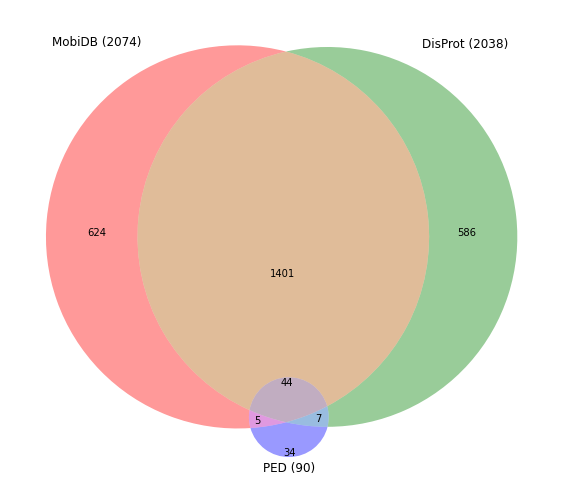

In [1]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
plt.figure(figsize=(11, 9))
venn3(subsets=(624, 586, 1401, 34, 5, 7, 44), set_labels=('MobiDB (2074)', 'DisProt (2038)', 'PED (90)'))
plt.savefig('venn.png')
plt.savefig('venn.pdf')
plt.show()

## Venn diagram from dataset

In [2]:
import json
import rdflib
from rdflib import ConjunctiveGraph, plugin
from rdflib.serializer import Serializer

In [4]:
# load dataset
idpKG = ConjunctiveGraph()
#dataset = 'IDPKG-Sample8.nq'
dataset = 'IDPKG-Sample25.nq'
#dataset = 'IDPKG-Full.nq'
#dataset = 'IDPKG.nq'
print(f"Loading dataset {dataset} ...")
idpKG.parse(dataset, format="nquads")
print(f"IDP-KG has {len(idpKG)} statements.")

# run query
#queryFile = 'proteins/protein-per-dataset.rq'
queryFile = 'proteins/proteins-by-dataset-groupings.rq'
print(f'Running query {queryFile} ...')
with open('../queries/'+queryFile) as f:
    query = f.read()
results = idpKG.query(query)
results = json.loads(results.serialize(format="json"))
print(f"Number of Results: {len(results['results']['bindings'])}")

Loading dataset IDPKG-Sample25.nq ...
IDP-KG has 6594 statements.
Running query proteins/proteins-by-dataset-groupings.rq ...
Number of Results: 25


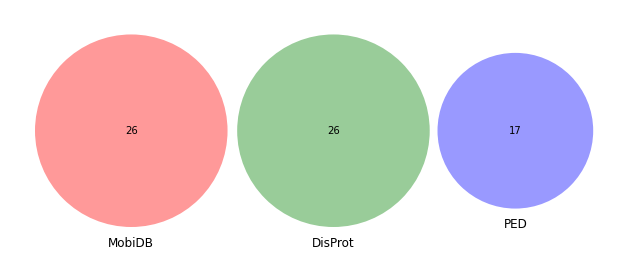

In [5]:
# extract subsets
Abc = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == 'MobiDB \ (DisProt U PED)')))
aBc = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == 'DisProt \ (MobiDB U PED)')))
ABc = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == '(DisProt n MobiDB) \ PED')))
abC = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == 'PED \ (DisProt U MobiDB)')))
AbC = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == '(MobiDB n PED) \ DisProt')))
aBC = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == '(DisProt n PED) \ MobiDB')))
ABC = int(next((i['count']['value'] for i in results['results']['bindings'] if i['description']['value'] == 'DisProt n MobiDB n PED')))

# plot Venn diagram
plt.figure(figsize=(11, 9))
venn3(subsets=(Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels=('MobiDB', 'DisProt', 'PED'))
plt.show()